In [2]:
import time
import numpy as np
from scipy.optimize import curve_fit
import datetime
import random
import matplotlib.pyplot as plt
from decimal import *
import statistics

In [3]:
# Function for vector creature
def generate_vector(n):
    return [random.randint(0, 10000000) for _ in range(n)]

In [4]:
# Function for square matrix creature
def generate_square_matrix(n, empty=False):
    if empty:
        return [[0 for _ in range(n)] for _ in range(n)]
    else:
        return [generate_vector(n) for _ in range(n)]

In [5]:
# Function-decorator for calculate time complexity
def pin_time(func):
    def wrapper(vector, *args, **kwargs):
        t_start = time.time()
        func(vector, *args, **kwargs)
        t_end = time.time()
        time_deltas.append(t_end-t_start)
    return wrapper

In [7]:
# Functions for theoretical time complixities with arguments x - dependent variable and coefficients which are found by approximation
def const(x, a):
    return a

def linear(x, a, b):
    return a + b*x

def log(x, a):
    return a * x * np.log(x)

def square(x, a, b, c):
    return a * x * x + b * x + c

def cubic(x, a, b, c, d):
    return a * x * x * x + b * x * x + c * x + d

In [9]:
# Const function
@pin_time
def const_func(vector):
    return 100

In [10]:
# Sum of vector elements
@pin_time
def sum_func(vector):
    sum = 0
    for v in vector:
        sum += v
    return sum

In [11]:
# Product of vector elements
@pin_time
def product_f(vector):
    prod = 1
    for i in range(len(vector)):
        prod *= vector[i]
    return prod

In [12]:
# Find P(1.5) where P is polynomial by direct calculation
@pin_time
def polynomial_direct(vector, x=1.5):
    P = 0
    for i in range(0, len(vector)):
        P += Decimal(vector[i]) * (pow(Decimal(x), Decimal(i)))
    return P

In [13]:
# Find P(1.5) where P is polynomial by Horner's method
@pin_time
def polynomial_horner(vector, x=1.5):
    P = 0
    for v in vector[-1::-1]:
        P = P * x + v
    return P

In [14]:
# Bubble sort of vector elements
@pin_time
def bubble_sort(vector):
    for i in range(len(vector)):
        for j in range(len(vector)):
            if vector[i] < vector[j]:
                vector[i], vector[j] = vector[j], vector[i]
    return vector

In [15]:
# Qucksort of vector elements
@pin_time      
def quicksort(vector):
    def quick_sort(vector):
        if len(vector) < 2:
            return vector
        pivot = vector[-1]
        left = []
        right = []
        for i in vector[:-1]:
            left.append(i) if i > pivot else right.append(i)
        if len(left) > 1:
            left = quick_sort(left)
        if len(right) > 1:
            right = quick_sort(right)
        return right + [pivot] + left

    quick_sort(vector)

In [16]:
# Timsort of vector elements. Timsort is not really simple to implement by scratch so I used built-in sorted() function 
# because it implements a Timsort algorithm (https://www.geeksforgeeks.org/timsort/, https://en.wikipedia.org/wiki/Timsort) 
@pin_time
def timsort(vector):
    return sorted(vector)

In [17]:
# Find a usual matrix product
@pin_time
def product_matrices(matrix_A, matrix_B, prod):
    for i in range(len(matrix_A)):
        for j in range(len(matrix_B[0])):
            for k in range(len(matrix_B)):
                prod[i][j] += matrix_A[i][k] * matrix_B[k][j]
    return prod

In [11]:
# Draw the results
def draw_graphics(X, Y, func_theoretical):
    plt.figure(figsize=(14, 7))
    
    # use curve_fit() for approximation the results
    popt, pcov = curve_fit(func_theoretical, X, Y)
    
    # find f(X) values for theoretical graph
    Y_theoretical = []
    for x in X:
        Y_theoretical.append(func_theoretical(x, *popt))
        
    plt.plot(X, Y, label="Experimental results")
    plt.plot(X, Y_theoretical, label="Approximation")
    
    plt.ylabel('Average time, sec')
    plt.xlabel('Dimension of vector v (n)')
    plt.legend()
    plt.show()

In [10]:
def main(func, func_theoretical):
    all_times = {}
    global time_deltas
    for n in range(1, 2001):
        time_deltas = []
        v = generate_vector(n)
        for i in range(5):
            func(v)
#             func(v, 0, n-1)
#             A, B, prod = generate_square_matrix(n), generate_square_matrix(n), generate_square_matrix(n, True)
#             func(A, B, prod)
        all_times[n] = statistics.mean(time_deltas)
    draw_graphics(list(all_times.keys()), list(all_times.values()), func_theoretical)

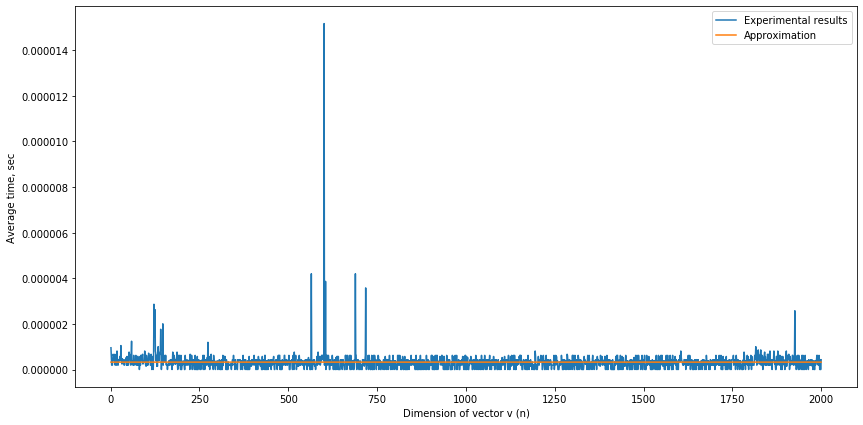

In [40]:
# 1 - The result for const function
main(const_func, const)

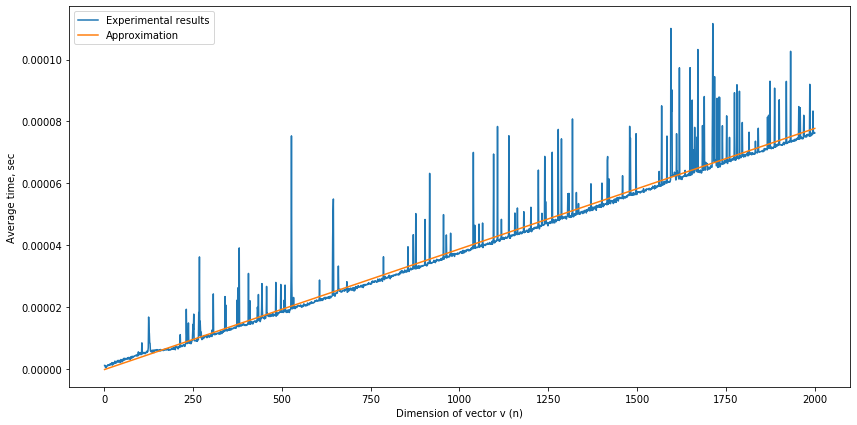

In [53]:
# 2 - The result for a sum of elements
main(sum_func, linear)

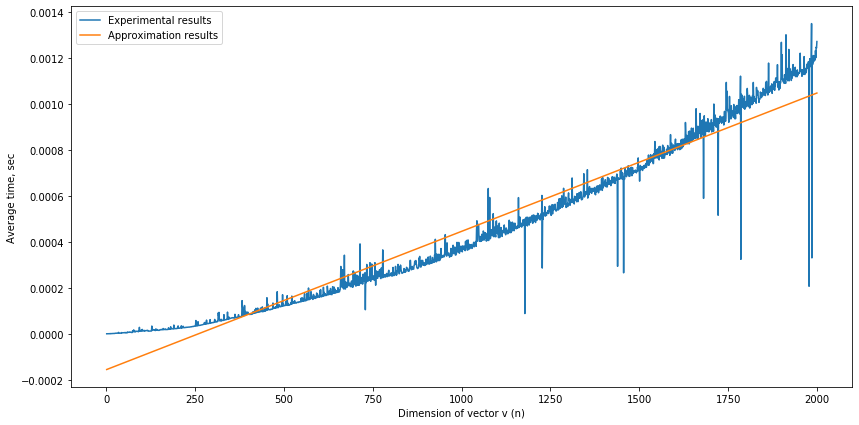

In [196]:
# 3 - The result for the product of elemetns of vector
main(product_f, linear)

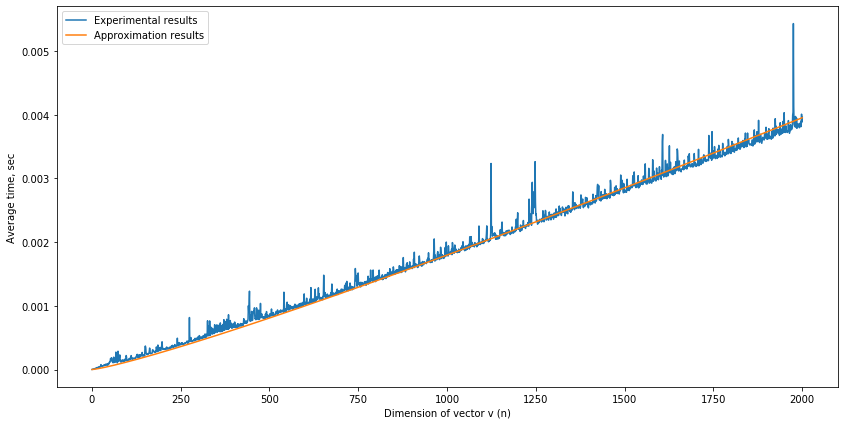

In [325]:
# 4.1 - The result for finding the coefficint for polynomial P by direct calculations
main(polynomial_direct_f, log)

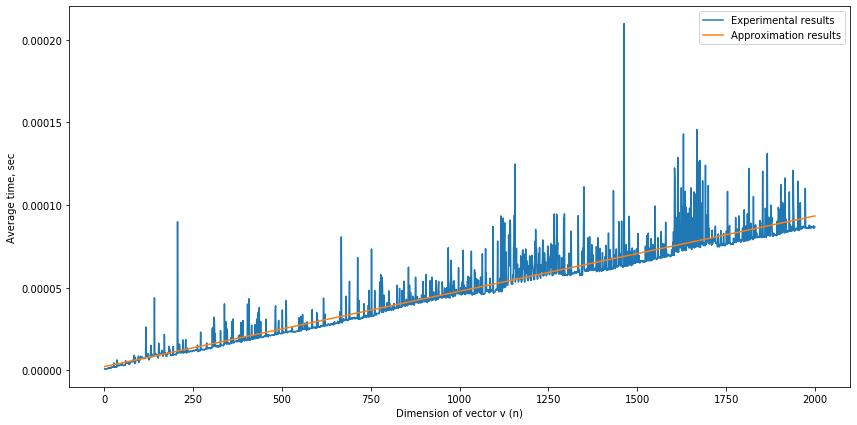

In [251]:
# 4.2 - The result for finding the coefficint for polynomial P by Horner's method
main(polynomial_horner_f, linear)

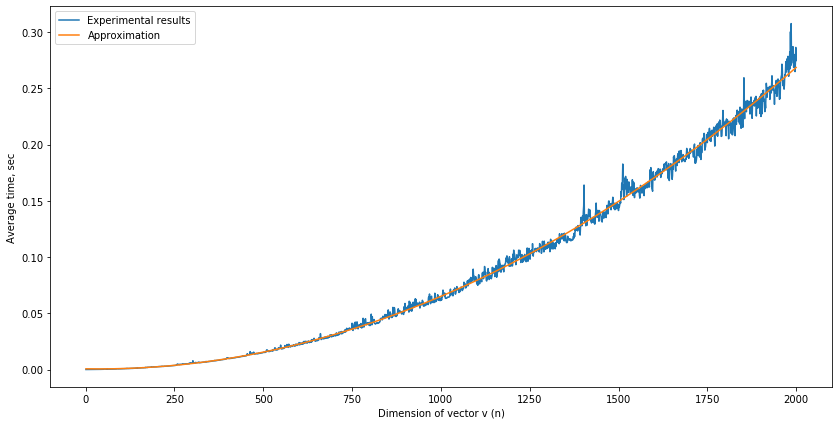

In [32]:
# 5 - The result for Bubble sort
main(bubble_sort, square)

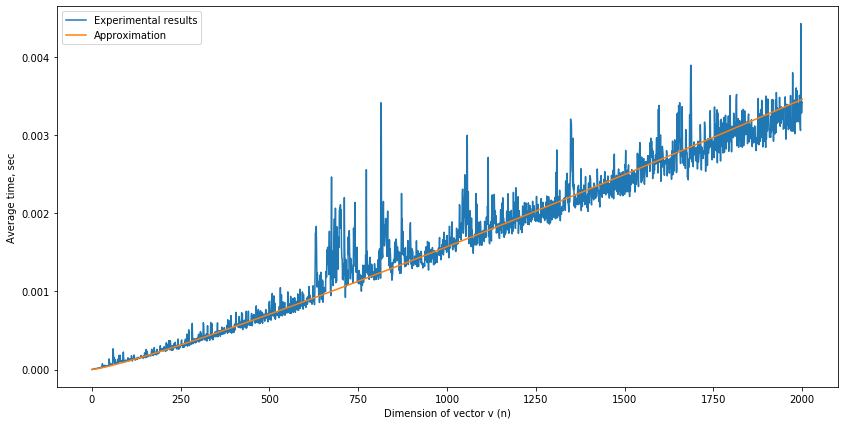

In [16]:
# 6 - The result for Quicksort
main(quicksort, log)

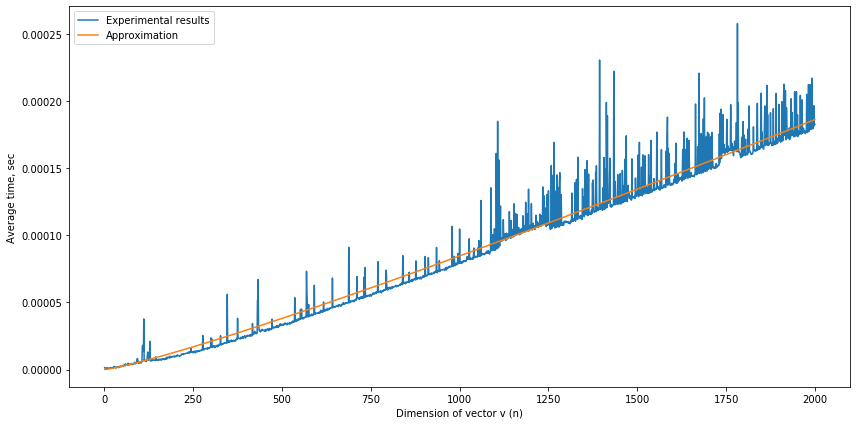

In [31]:
# 7 - The result for Timsort
main(timsort, log)

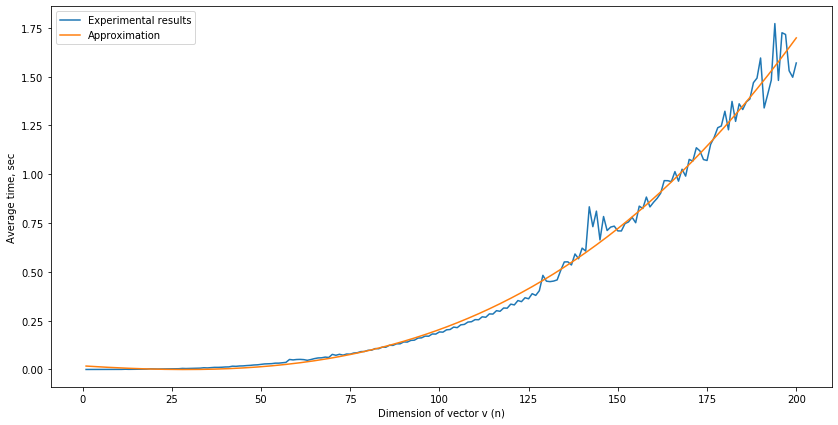

In [90]:
# Task 2 - The result for matrix product
main(product_matrices, cubic)